# This notebook will be used to run the ML algorithms.

First let us import the necessary libraries.

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Next we have to merge the 2 datasets vertically after the column names have been added.

In [88]:
# create a list containing the column names
column_names= ["age","workclass","fnlwgt","education","education.num","marital.status","occupation","relationship","race","sex","capital.gain","capital.loss","hours.per.week","native.country","income"]

# convert the .txt files to .csv
train = pd.read_csv('adult_data.txt', sep=",\s", header=None, names=column_names, engine='python') 
test = pd.read_csv('adult_test.txt', sep=",\s", header=None, names=column_names, engine='python')
test['income'].replace(regex=True,inplace=True,to_replace=r'\.',value=r'')

# merge the 2 data frames vertically
df = pd.concat([test,train])
df.reset_index(inplace=True, drop=True) # the index is reset
df

<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
C:\Users\arkha\AppData\Local\Temp\ipykernel_4492\1432966662.py:5: SyntaxWarning: invalid escape sequence '\s'
  train = pd.read_csv('adult_data.txt', sep=",\s", header=None, names=column_names, engine='python')
C:\Users\arkha\AppData\Local\Temp\ipykernel_4492\1432966662.py:6: SyntaxWarning: invalid escape sequence '\s'
  test = pd.read_csv('adult_test.txt', sep=",\s", header=None, names=column_names, engine='python')
C:\Users\arkha\AppData\Local\Temp\ipykernel_4492\1432966662.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,|1x3 Cross validator,None,NaN,None,NaN,None,None,None,None,None,NaN,NaN,NaN,None,None
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48838,27,Private,257302.0,Assoc-acdm,12.0,Married-civ-spouse,Tech-support,Wife,White,Female,0.0,0.0,38.0,United-States,<=50K
48839,40,Private,154374.0,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
48840,58,Private,151910.0,HS-grad,9.0,Widowed,Adm-clerical,Unmarried,White,Female,0.0,0.0,40.0,United-States,<=50K
48841,22,Private,201490.0,HS-grad,9.0,Never-married,Adm-clerical,Own-child,White,Male,0.0,0.0,20.0,United-States,<=50K


We can see that the 0th row has irrelevant values.

In [89]:
df = df.drop(index=0)
df = df.reset_index(drop=True)
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K
1,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
2,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
3,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K
4,18,?,103497.0,Some-college,10.0,Never-married,?,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302.0,Assoc-acdm,12.0,Married-civ-spouse,Tech-support,Wife,White,Female,0.0,0.0,38.0,United-States,<=50K
48838,40,Private,154374.0,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
48839,58,Private,151910.0,HS-grad,9.0,Widowed,Adm-clerical,Unmarried,White,Female,0.0,0.0,40.0,United-States,<=50K
48840,22,Private,201490.0,HS-grad,9.0,Never-married,Adm-clerical,Own-child,White,Male,0.0,0.0,20.0,United-States,<=50K


### Data Preprocessing

Let us check the dataset for null values.

In [90]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

Upon careful observation, it could be seen that though the code provides that there are no null values, some of the values in the columns with data type have been filled with just "?".

Let us fill them in using Simple Imputation

In [91]:
df.replace("?", pd.NA, inplace=True) # "?" are filled with NaN to make it easier

# the columns are imputed with mode since they are categorical
df["workclass"].fillna(df["workclass"].mode()[0], inplace=True)
df["native.country"].fillna(df["native.country"].mode()[0], inplace=True)
df["occupation"].fillna(df["occupation"].mode()[0], inplace=True)

df.isnull().sum() # to verify there are no more null values

C:\Users\arkha\AppData\Local\Temp\ipykernel_4492\530971923.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["workclass"].fillna(df["workclass"].mode()[0], inplace=True)
C:\Users\arkha\AppData\Local\Temp\ipykernel_4492\530971923.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a cop

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

The classification problem requires us to predict whether the income exceeds $50,000 per year. So if the income value is '<=50K', then the value is replaced with 0, else if the income value is '>50K', then the value is replaced with 1.

In [92]:
# the values are replaced with the respective new values in the income column
df['income'].replace({'<=50K':0, '>50K':1}, inplace=True)
df

C:\Users\arkha\AppData\Local\Temp\ipykernel_4492\2647791319.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['income'].replace({'<=50K':0, '>50K':1}, inplace=True)
C:\Users\arkha\AppData\Local\Temp\ipykernel_4492\2647791319.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['income'].repla

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,0
1,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,0
2,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,1
3,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,1
4,18,Private,103497.0,Some-college,10.0,Never-married,Prof-specialty,Own-child,White,Female,0.0,0.0,30.0,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302.0,Assoc-acdm,12.0,Married-civ-spouse,Tech-support,Wife,White,Female,0.0,0.0,38.0,United-States,0
48838,40,Private,154374.0,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.0,40.0,United-States,1
48839,58,Private,151910.0,HS-grad,9.0,Widowed,Adm-clerical,Unmarried,White,Female,0.0,0.0,40.0,United-States,0
48840,22,Private,201490.0,HS-grad,9.0,Never-married,Adm-clerical,Own-child,White,Male,0.0,0.0,20.0,United-States,0


### Feature Selection
Now we have to check which features of the dataset exactly contribute to the prediction.

It could be noted that the column "education.num" could prove to be useless in this particular classification problem. So this column could be dropped.

In [93]:
df = df.drop('education.num', axis=1) # the column is dropped
df

,age,workclass,fnlwgt,education,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,25,Private,226802.0,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,0
1,38,Private,89814.0,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,0
2,28,Local-gov,336951.0,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,1
3,44,Private,160323.0,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,1
4,18,Private,103497.0,Some-college,Never-married,Prof-specialty,Own-child,White,Female,0.0,0.0,30.0,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302.0,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0.0,0.0,38.0,United-States,0
48838,40,Private,154374.0,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.0,40.0,United-States,1
48839,58,Private,151910.0,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0.0,0.0,40.0,United-States,0
48840,22,Private,201490.0,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,0.0,0.0,20.0,United-States,0


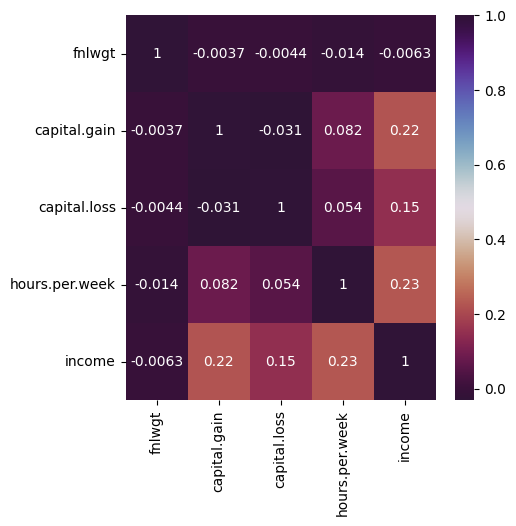

In [94]:
numeric_df = df.select_dtypes(include='number') # only the numeric columns have to be selected
corrmat = numeric_df.corr() # the correlation matrix is calculated
plt.figure(figsize=(5,5)) # the size of the figure is specified
sns.heatmap(corrmat, annot=True, cmap='twilight_shifted_r') # the heatmap is plotted
plt.show()

Correlation is used for identifying the relationship between a binary variable (income) and a continuous variable.

In [95]:
columns = ['age', 'capital.loss', 'capital.gain', 'hours.per.week', 'fnlwgt']

df['income'] = pd.to_numeric(df['income'], errors='coerce')

for column in columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')

    cov_value = np.cov(df['income'], df[column])[0, 1]  # Calculate covariance between income and the current column
    
    # if the value is greater than zero, it is positive or else it is negative correlation
    if cov_value > 0:
        status = "positive correlation"
    else:
        status = "negative correlation"
    
    print(column, ":", cov_value, " - ", status)  # Print column name, covariance value, and correlation status


age : 1.347564893781695  -  positive correlation
capital.loss : 25.370763521641152  -  positive correlation
capital.gain : 709.0475144310706  -  positive correlation
hours.per.week : 1.2037349188948607  -  positive correlation
fnlwgt : -285.602998266368  -  negative correlation


Through this we can see that only the "fnlwgt" column has a negative correlation with the income column.

Let us confirm this statement with the use of logistic regression.

In [96]:
import statsmodels.api as sm

X = sm.add_constant(df[['age', 'capital.loss', 'capital.gain', 'hours.per.week', 'fnlwgt']])
y = df['income'] # the target variable is assigned
logistic_model = sm.Logit(y, X) # a logistic regression model instance is created
result = logistic_model.fit() # the model is fitted
print(result.summary()) # print the summary

Optimization terminated successfully.
         Current function value: 0.447439
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                 income   No. Observations:                48842
Model:                          Logit   Df Residuals:                    48836
Method:                           MLE   Df Model:                            5
Date:                Tue, 27 Feb 2024   Pseudo R-squ.:                  0.1868
Time:                        20:15:41   Log-Likelihood:                -21854.
converged:                       True   LL-Null:                       -26875.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -4.9314      0.069    -71.895      0.000      -5.066      -4.797
age              

Using this report, it could be seen that the all the columns have an impact on the "income" column. However, when analysing the "fnlwgt" column, we know it plays some impact on the "income" column as the coefficient is not zero. However, this impact seems to be insignificant when considering in a practical sitution.

Thus due to its lack of impact, the "fnlwgt" column could be dropped.

In [97]:
df = df.drop('fnlwgt', axis=1)
df

,age,workclass,education,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,25,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,0
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,0
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,1
3,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,1
4,18,Private,Some-college,Never-married,Prof-specialty,Own-child,White,Female,0.0,0.0,30.0,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0.0,0.0,38.0,United-States,0
48838,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.0,40.0,United-States,1
48839,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0.0,0.0,40.0,United-States,0
48840,22,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,0.0,0.0,20.0,United-States,0


Next we have to perform One Hot Encoding to create binary columns for each categorical value.

In [98]:
categorical_columns = df.columns[df.dtypes == object].tolist() # the columns are converted into a list
df = pd.get_dummies(df, columns=categorical_columns)
df

,age,capital.gain,capital.loss,hours.per.week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
0,25,0.0,0.0,40.0,0,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
1,38,0.0,0.0,50.0,0,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
2,28,0.0,0.0,40.0,1,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,44,7688.0,0.0,40.0,1,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
4,18,0.0,0.0,30.0,0,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,0.0,0.0,38.0,0,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
48838,40,0.0,0.0,40.0,1,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
48839,58,0.0,0.0,40.0,0,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
48840,22,0.0,0.0,20.0,0,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False


Min Max Scaler could be used to provide a value between 0 and 1 for all the numerical columns.

In [99]:
from sklearn.preprocessing import MinMaxScaler

scalable_columns = ['age','capital.gain','capital.loss','hours.per.week'] #columns with numerical values
min_max_scaler = MinMaxScaler() # creating an instance of the Min Max Scaler
scaled_columns = min_max_scaler.fit_transform(df[scalable_columns]) 

# now the values could be assigned back to the respective column in the DataFrame
df['age']=scaled_columns[:,0]
df['capital.gain']=scaled_columns[:,1]
df['capital.loss']=scaled_columns[:,2]
df['hours.per.week']=scaled_columns[:,3]

df

,age,capital.gain,capital.loss,hours.per.week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
0,0.109589,0.000000,0.0,0.397959,0,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
1,0.287671,0.000000,0.0,0.500000,0,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
2,0.150685,0.000000,0.0,0.397959,1,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,0.369863,0.076881,0.0,0.397959,1,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
4,0.013699,0.000000,0.0,0.295918,0,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,0.136986,0.000000,0.0,0.377551,0,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
48838,0.315068,0.000000,0.0,0.397959,1,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
48839,0.561644,0.000000,0.0,0.397959,0,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
48840,0.068493,0.000000,0.0,0.193878,0,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False


This is how the final data frame would look like after the preprocessing techniques have been carried out.

### Machine Learning Algorithms

#### 1. Naïve Bayes Classifier model

#### 2. Random Forest Classifier model

In [100]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score, classification_report

rf_model = RandomForestClassifier(random_state=42) # an instance of the model is created

x = df.drop('income', axis=1) # the input features are defined
y = df['income'] # the output feature (income) is defined

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42) # 70% training split is taken

rf = rf_model.fit(x_train, y_train) # the model is trained using the training data
predictions_rf = rf.predict(x_test) # the model is tested using the testing inputs

accuracy_rf = accuracy_score(y_test, predictions_rf) # the accuracy score is calculated
print(f"Accuracy is {accuracy_rf}") # the accuracy is printed


r2_val_rf = r2_score(y_test, predictions_rf) # the r2 score is calculated
print(f"r2 score is {r2_val_rf}") # the r2 score is printed

print(classification_report(y_test, predictions_rf)) # the classification report is printed

Accuracy is 0.8515662321708866
r2 score is 0.17040916410138662
              precision    recall  f1-score   support

           0       0.89      0.92      0.90     11233
           1       0.70      0.63      0.67      3420

    accuracy                           0.85     14653
   macro avg       0.80      0.78      0.78     14653
weighted avg       0.85      0.85      0.85     14653



##### Let us try to increase the accuracy by tuning the hyperparameters.

Changing the training and testing split

In [101]:
rf_model = RandomForestClassifier(random_state=42)

x = df.drop('income', axis=1)
y = df['income']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) # 80% training split

rf = rf_model.fit(x_train, y_train) # the model is trained using the training data
predictions_rf = rf.predict(x_test) # the model is tested using the testing inputs

accuracy_rf = accuracy_score(y_test, predictions_rf) # the accuracy score is calculated
print(f"Accuracy is {accuracy_rf}") # the accuracy is printed

r2_val_rf = r2_score(y_test, predictions_rf) # the r2 score is calculated
print(f"r2 score is {r2_val_rf}") # the r2 score is printed

print(classification_report(y_test, predictions_rf)) # the classification report is printed

Accuracy is 0.8511618384686253
r2 score is 0.1706544846676954
              precision    recall  f1-score   support

           0       0.89      0.92      0.90      7479
           1       0.70      0.63      0.67      2290

    accuracy                           0.85      9769
   macro avg       0.80      0.78      0.78      9769
weighted avg       0.85      0.85      0.85      9769



Adding parameters such as minimal samples to split an internal node and the maximum depth of the decision trees.

In [102]:
rf_model = RandomForestClassifier(min_samples_split=10, max_depth=10, random_state=42)

x = df.drop('income', axis=1)
y = df['income']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) # 70% training split

rf = rf_model.fit(x_train, y_train) # the model is trained using the training data
predictions_rf = rf.predict(x_test) # the model is tested using the testing inputs

accuracy_rf = accuracy_score(y_test, predictions_rf) # the accuracy score is calculated
print(f"Accuracy is {accuracy_rf}") # the accuracy is printed

r2_val_rf = r2_score(y_test, predictions_rf) # the r2 score is calculated
print(f"r2 score is {r2_val_rf}") # the r2 score is printed

print(classification_report(y_test, predictions_rf)) # the classification report is printed

Accuracy is 0.8608864776333299
r2 score is 0.2248414337437401
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      7479
           1       0.81      0.53      0.64      2290

    accuracy                           0.86      9769
   macro avg       0.84      0.75      0.78      9769
weighted avg       0.86      0.86      0.85      9769



Tuning the minimum number of samples to split an internal node.

In [103]:
rf_model = RandomForestClassifier(min_samples_split=20, max_depth=10, random_state=42)

x = df.drop('income', axis=1)
y = df['income']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) # 70% training split

rf = rf_model.fit(x_train, y_train) # the model is trained using the training data
predictions_rf = rf.predict(x_test) # the model is tested using the testing inputs

accuracy_rf = accuracy_score(y_test, predictions_rf) # the accuracy score is calculated
print(f"Accuracy is {accuracy_rf}") # the accuracy is printed

r2_val_rf = r2_score(y_test, predictions_rf) # the r2 score is calculated
print(f"r2 score is {r2_val_rf}") # the r2 score is printed

print(classification_report(y_test, predictions_rf)) # the classification report is printed

Accuracy is 0.8625243115979118
r2 score is 0.23396765674602127
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      7479
           1       0.81      0.54      0.65      2290

    accuracy                           0.86      9769
   macro avg       0.84      0.75      0.78      9769
weighted avg       0.86      0.86      0.85      9769



Increasing the number of samples to split an internal node reduces the accuracy of the model. Thus we can revert to the original value.

Tuning the maximum depth of the decision trees.

In [104]:
rf_model = RandomForestClassifier(min_samples_split=10, max_depth=20, random_state=42)

x = df.drop('income', axis=1)
y = df['income']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) # 70% training split

rf = rf_model.fit(x_train, y_train) # the model is trained using the training data
predictions_rf = rf.predict(x_test) # the model is tested using the testing inputs

accuracy_rf = accuracy_score(y_test, predictions_rf) # the accuracy score is calculated
print(f"Accuracy is {accuracy_rf}") # the accuracy is printed

r2_val_rf = r2_score(y_test, predictions_rf) # the r2 score is calculated
print(f"r2 score is {r2_val_rf}") # the r2 score is printed

print(classification_report(y_test, predictions_rf)) # the classification report is printed

Accuracy is 0.8695874705701709
r2 score is 0.27332449344335896
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      7479
           1       0.79      0.60      0.68      2290

    accuracy                           0.87      9769
   macro avg       0.84      0.78      0.80      9769
weighted avg       0.86      0.87      0.86      9769



By analyzing the classification report, we can come up with the following conclusions.
* In general, the precision, recall and the f1-score are higher for class zero than for class one. 
* However, since the macro average and the weighted average are relatively close, it depicts a balance in the performance between classes.

Thus we can say the model is not overfitting or underfitting.

Other models which are more suited to these scenarios such as Adaptive Gradient Boost could be used to obtain better results.

#### Now let us try using the scikit- optimize library to come up with the most optimal parameters.

In [105]:
# from skopt import gp_minimize

# x = df.drop('income', axis=1)
# y = df['income']

# def objective_func(params):
#     n_estimators, max_depth, min_samples_split = params

#     rf_model = RandomForestClassifier(
#         n_estimators=int(n_estimators),
#         max_depth=int(max_depth),
#         min_samples_split=int(min_samples_split),
#         random_state=42
#     )

#     x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) # 70% training split

#     rf = rf_model.fit(x_train, y_train) # the model is trained using the training data
#     predictions_rf = rf.predict(x_test) # the model is tested using the testing inputs
    
#     accuracy_rf = accuracy_score(y_test, predictions_rf)
#     return -accuracy_rf

# # define a trial space for the hyperparameters
# space = [(10,200), 
#          (1,20), 
#          (2,10)]





# result = gp_minimize(objective_func, space, n_calls=20) # hyperparamter optimization is performed

# best_parameters = result.x
# print("Best hyperparameters: ", best_parameters) # best values are provided

# # the final model is trained with the best hyperparameters
# best_rf_model = RandomForestClassifier(
#     min_samples_split=int(best_parameters[0]),
#     max_depth=int(best_parameters[1]),
#     n_estimators=int(best_parameters[2]),
#     random_state=42
# )

# best_rf = best_rf_model.fit(x_train, y_train)
# predictions_final_rf = best_rf.predict(x_test)

# # the final model is evaluated based on metrics
# final_accuracy = accuracy_score(y_test, predictions_final_rf)
# final_r2_val = r2_score(y_test, predictions_final_rf)

# print(f"Final Accuracy: {final_accuracy}")
# print(f"Final R2 Score: {final_r2_val}")
# print("Classification Report for the Final Model:")
# print(classification_report(y_test, predictions_final_rf))